### Correlation Analysis of Feature Set 1

In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import heapq

#### Down Milling

In [163]:
up_or_down = 'down' # or down
all_data = pd.read_csv('../data/feature_set1/train_{}_Y.csv'.format(up_or_down))
all_data.drop(index=[48, 49, 51, 72, 91],axis=0,inplace=True)  # drop outliers
all_data.head()

Nr.  spindle_speed   ap     fz   Ra_down   vbs   clamp_t1     clamp_t2  \
0    1           8000  0.2  0.050  12.83250   800  23.664093   917.580527   
1    2           8000  0.2  0.065   6.47625  1040  28.025455  1817.287671   
2    3           8000  0.2  0.075   8.42100  1200  24.258964  2600.600669   
3    4           8000  0.2  0.100   6.81600  1600  23.584906  4141.970983   
4    5           8000  0.4  0.050  12.51250   800  43.182927  1232.354156   

    clamp_t3  clamp_t4  ...  robot_t4  robot_t5  robot_t6  robot_t7  robot_t8  \
0  38.393060     131.0  ...    1159.0     340.0 -0.164626  3.279446  1.164723   
1  50.951992     153.0  ...    1114.0     286.0 -0.152276  2.869851  1.125636   
2  56.380290     175.0  ...    1205.0     350.0  0.195294  2.681590  1.214723   
3  68.429443     212.0  ...    1206.0     438.0 -0.022681  2.818957  1.221912   
4  55.606742     132.0  ...    1147.0     275.0  0.136498  2.464138  1.154345   

   robot_t9   clamp_f1   clamp_f2   robot_f1   robot_f2  
0  1.162811  12.222404  19.191919  22.863227  14.646465  
1  1.123908  17.382572  21.717172  25.495338  31.313131  
2  1.212308  20.770490  21.717172  37.602301  31.313131  
3  1.217963  27.491432  21.717172  39.944840   5.050505  
4  1.152213  18.159337   9.595960  33.502295   6.060606  

[5 rows x 28 columns]

In [164]:
used_feature = ['spindle_speed', 'ap', 'fz','vbs']

**Compute Pearson correlation coefficient for every selected feature**

In [165]:
person_coeff = []
for i in used_feature:
     person_coeff.append((pearsonr(all_data[i], all_data['Ra_down'])[0]))

In [166]:
person_coeff

[-0.6603798377038522,
 0.010305957248755108,
 -0.5189616518130368,
 -0.8078326023759597]

In [167]:
np.argmax([abs(ele) for ele in person_coeff])

3

In [168]:
person_coeff = [abs(ele) for ele in person_coeff]

In [169]:
select_top_num = 26
# compute index of20 largest elements from person_coeff
max_num_index_list = list(map(person_coeff.index, heapq.nlargest(select_top_num, person_coeff)))

# select column name in max_num_index_list
selected_feature = []
selected_feature_value = []
for i in max_num_index_list:
    selected_feature.append(used_feature[i])
    selected_feature_value.append(person_coeff[i])

In [170]:
selected_feature

['vbs', 'spindle_speed', 'fz', 'ap']

In [171]:
selected_feature = ['Vorschubgeschwindigkeit',
 'Spindeldrehzahl',
 'Vorschub pro Zahn',
 'Schnitttiefe']

In [172]:
feature_imp = pd.DataFrame({'Korrelationskoeffizient': selected_feature_value, 'Merkmal': selected_feature})

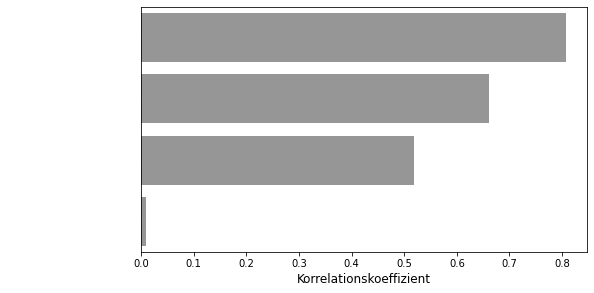

In [177]:
fig, ax = plt.subplots(figsize=(16/2, 9/2))
b = sns.barplot(x='Korrelationskoeffizient', y='Merkmal', data=feature_imp.sort_values(by='Korrelationskoeffizient', ascending=False), 
               color=(150/255, 150/255, 150/255))
b.set_xlabel('Korrelationskoeffizient', fontsize=12)
ax.tick_params(axis='y', colors='white')
ax.set_ylabel('')
plt.savefig('../images/Korrelationsanalyse1.svg')

In [178]:
def plotPerson(list_value, list_name , num = 20, fig_size = (40, 20)):
    feature_imp = pd.DataFrame({'Value': list_value,'Feature': list_name})
    sns.set(font_scale = 5)
    plt.figure(figsize=fig_size)
    sns.barplot(x="Value", y="Feature", data = feature_imp.sort_values(by = "Value", 
                ascending = False)[0:num])
    plt.tight_layout()
    plt.savefig('correlation_analysis.png')
    plt.show()
    return feature_imp

In [179]:
up_or_down = 'down' # or down
all_data = pd.read_csv('../data/feature_set1/train_{}_Y.csv'.format(up_or_down))
all_data.drop(index=[48, 49, 51, 72, 91],axis=0,inplace=True)  # drop outliers
all_data.head()

Nr.  spindle_speed   ap     fz   Ra_down   vbs   clamp_t1     clamp_t2  \
0    1           8000  0.2  0.050  12.83250   800  23.664093   917.580527   
1    2           8000  0.2  0.065   6.47625  1040  28.025455  1817.287671   
2    3           8000  0.2  0.075   8.42100  1200  24.258964  2600.600669   
3    4           8000  0.2  0.100   6.81600  1600  23.584906  4141.970983   
4    5           8000  0.4  0.050  12.51250   800  43.182927  1232.354156   

    clamp_t3  clamp_t4  ...  robot_t4  robot_t5  robot_t6  robot_t7  robot_t8  \
0  38.393060     131.0  ...    1159.0     340.0 -0.164626  3.279446  1.164723   
1  50.951992     153.0  ...    1114.0     286.0 -0.152276  2.869851  1.125636   
2  56.380290     175.0  ...    1205.0     350.0  0.195294  2.681590  1.214723   
3  68.429443     212.0  ...    1206.0     438.0 -0.022681  2.818957  1.221912   
4  55.606742     132.0  ...    1147.0     275.0  0.136498  2.464138  1.154345   

   robot_t9   clamp_f1   clamp_f2   robot_f1   robot_f2  
0  1.162811  12.222404  19.191919  22.863227  14.646465  
1  1.123908  17.382572  21.717172  25.495338  31.313131  
2  1.212308  20.770490  21.717172  37.602301  31.313131  
3  1.217963  27.491432  21.717172  39.944840   5.050505  
4  1.152213  18.159337   9.595960  33.502295   6.060606  

[5 rows x 28 columns]

In [180]:
used_feature = ['clamp_t1',
       'clamp_t2', 'clamp_t3', 'clamp_t4', 'clamp_t5', 'clamp_t6', 'clamp_t7', 'clamp_t8', 'clamp_t9',
       'clamp_f1', 'clamp_f2',
       'robot_t1', 'robot_t2', 'robot_t3', 'robot_t4', 'robot_t5', 'robot_t6', 'robot_t7', 'robot_t8', 'robot_t9',
       'robot_f1', 'robot_f2']

**Compute Pearson correlation coefficient for every selected feature**

In [181]:
person_coeff = []
for i in used_feature:
     person_coeff.append((pearsonr(all_data[i], all_data['Ra_down'])[0]))

In [182]:
person_coeff

[0.05238909718597462,
 -0.4438127895113553,
 -0.44805271931448215,
 -0.35364383420459133,
 -0.3603450107782836,
 -0.10947526747862805,
 0.5126930939620254,
 0.42912336371680354,
 0.4656371282858357,
 -0.3743823473379549,
 -0.2731017310233151,
 0.0927938899560403,
 -0.21603384968136374,
 -0.13700434741677983,
 -0.15939160970007152,
 -0.16682118617715105,
 0.0703264488268074,
 0.12156472837706674,
 -0.16331889164024468,
 -0.15691113559282033,
 -0.06026948071450918,
 -0.4952646201641377]

In [183]:
np.argmax([abs(ele) for ele in person_coeff])

6

In [184]:
person_coeff = [abs(ele) for ele in person_coeff]

In [185]:
select_top_num = 26
# compute index of20 largest elements from person_coeff
max_num_index_list = list(map(person_coeff.index, heapq.nlargest(select_top_num, person_coeff)))

# select column name in max_num_index_list
selected_feature = []
selected_feature_value = []
for i in max_num_index_list:
    selected_feature.append(used_feature[i])
    selected_feature_value.append(person_coeff[i])

In [186]:
selected_feature

['clamp_t7',
 'robot_f2',
 'clamp_t9',
 'clamp_t3',
 'clamp_t2',
 'clamp_t8',
 'clamp_f1',
 'clamp_t5',
 'clamp_t4',
 'clamp_f2',
 'robot_t2',
 'robot_t5',
 'robot_t8',
 'robot_t4',
 'robot_t9',
 'robot_t3',
 'robot_t7',
 'clamp_t6',
 'robot_t1',
 'robot_t6',
 'robot_f1',
 'clamp_t1']

In [187]:
selected_feature = ['CT7',
 'RF2',
 'CT9',
 'CT3',
 'CT2',
 'CT8',
 'CF1',
 'CT5',
 'CT4',
 'CF2',
 'RT2',
 'RT5',
 'RT8',
 'RT4',
 'RT9',
 'RT3',
 'RT7',
 'CT6',
 'RT1',
 'RT6',
 'RF1',
 'CT1',]

In [188]:
feature_imp = pd.DataFrame({'Korrelationskoeffizient': selected_feature_value, 'Merkmal': selected_feature})

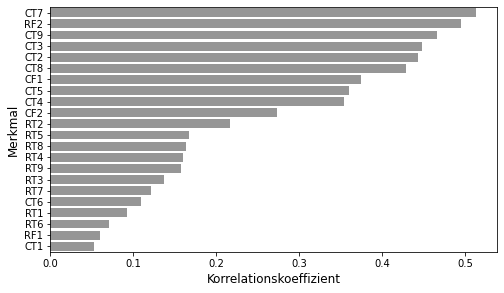

In [190]:
plt.figure(figsize=(16/2, 9/2))
b = sns.barplot(x='Korrelationskoeffizient', y='Merkmal', data=feature_imp.sort_values(by='Korrelationskoeffizient', ascending=False), 
           color=(150/255, 150/255, 150/255))
b.set_xlabel('Korrelationskoeffizient', fontsize=12)
b.set_ylabel('Merkmal', fontsize=12)
plt.savefig('../images/Korrelationsanalyse2.svg')

In [47]:
sns.set()

In [48]:
speed = all_data.spindle_speed
fz = all_data.fz
vbs = all_data.vbs

In [52]:
np.corrcoef(speed, vbs)

array([[1.        , 0.68096947],
       [0.68096947, 1.        ]])

In [53]:
np.corrcoef(speed, fz)

array([[ 1.        , -0.01335256],
       [-0.01335256,  1.        ]])

In [54]:
np.corrcoef(fz, vbs)

array([[1.        , 0.70274481],
       [0.70274481, 1.        ]])

In [55]:
# vbs, spindle speed and fz are correlated over the relationship: vbs = fz*z*speed

In [57]:
# vbs has highes correlation with Ra --> fits with the result from rf_regressor, where very high accury is occuring when only vbs is used as predictor

#### Up Milling

In [13]:
up_or_down = 'up' # or down
all_data = pd.read_csv('../data/feature_set1/train_{}_Y.csv'.format(up_or_down))
all_data.drop(index=[48, 49, 51, 72, 91],axis=0,inplace=True)  # drop outliers
all_data.head()

Nr.  spindle_speed   ap     fz     Ra_up   vbs   clamp_t1     clamp_t2  \
0    1           8000  0.2  0.050  12.90500   800  26.229323  1295.769854   
1    2           8000  0.2  0.065   6.78175  1040  29.329545   994.685664   
2    3           8000  0.2  0.075   8.43450  1200  22.787313  1504.542610   
3    4           8000  0.2  0.100   6.77025  1600  28.397163  2118.802554   
4    5           8000  0.4  0.050  12.54250   800  43.666667   824.102151   

    clamp_t3  clamp_t4  ...  robot_t4  robot_t5  robot_t6  robot_t7  robot_t8  \
0  44.484558     155.0  ...    1210.0     384.0  0.295203  2.858728  1.223420   
1  43.024878     128.0  ...    1221.0     454.0  0.129026  2.502421  1.249903   
2  44.924273     151.0  ...    1246.0     474.0  0.202293  2.518253  1.249318   
3  54.015627     169.0  ...    1278.0     614.0  0.179430  2.414027  1.287632   
4  52.226146     126.0  ...    1128.0     311.0  0.169912  3.404943  1.141053   

   robot_t9   clamp_f1   clamp_f2   robot_f1  robot_f2  
0  1.219488  17.582900  21.717172  51.978762  5.050505  
1  1.244343  15.763967  21.717172  45.485476  4.545455  
2  1.243240  20.080109  21.717172  63.985078  5.050505  
3  1.278015  20.092329  21.717172  84.466924  5.050505  
4  1.139565  13.043699   9.595960  32.618295  6.060606  

[5 rows x 28 columns]

In [14]:
used_feature = ['spindle_speed', 'ap', 'fz','vbs', 'clamp_t1',
       'clamp_t2', 'clamp_t3', 'clamp_t4', 'clamp_t5', 'clamp_t6', 'clamp_t7', 'clamp_t8', 'clamp_t9',
       'clamp_f1', 'clamp_f2',
       'robot_t1', 'robot_t2', 'robot_t3', 'robot_t4', 'robot_t5', 'robot_t6', 'robot_t7', 'robot_t8', 'robot_t9',
       'robot_f1', 'robot_f2']

**Compute Pearson correlation coefficient for every selected feature**

In [16]:
person_coeff = []
for i in used_feature:
     person_coeff.append((pearsonr(all_data[i], all_data['Ra_up'])[0]))

In [24]:
person_coeff

[0.6639597666465618,
 0.001971669153572384,
 0.5407457490307653,
 0.8243912628524599,
 0.002000460084269056,
 0.4594557124390933,
 0.47202166870178053,
 0.34865322901120904,
 0.3694516679247769,
 0.3659324587898776,
 0.5563922826325102,
 0.5155552311326201,
 0.5241261380301722,
 0.4160846033221873,
 0.2634617442917374,
 0.04422325533229017,
 0.2570086279105368,
 0.1466215043151809,
 0.2701673823639141,
 0.2092404323414939,
 0.17805874751716072,
 0.052074297035579066,
 0.27305083727345825,
 0.27183229029576184,
 0.02253295632180626,
 0.36775016640533315]

In [18]:
np.argmax([abs(ele) for ele in person_coeff])

3

In [19]:
person_coeff = [abs(ele) for ele in person_coeff]

In [20]:
select_top_num = 20
# compute index of20 largest elements from person_coeff
max_num_index_list = list(map(person_coeff.index, heapq.nlargest(select_top_num, person_coeff)))

# select column name in max_num_index_list
selected_feature = []
selected_feature_value = []
for i in max_num_index_list:
    selected_feature.append(used_feature[i])
    selected_feature_value.append(person_coeff[i])

In [21]:
selected_feature

['vbs',
 'spindle_speed',
 'clamp_t7',
 'fz',
 'clamp_t9',
 'clamp_t8',
 'clamp_t3',
 'clamp_t2',
 'clamp_f1',
 'clamp_t5',
 'robot_f2',
 'clamp_t6',
 'clamp_t4',
 'robot_t8',
 'robot_t9',
 'robot_t4',
 'clamp_f2',
 'robot_t2',
 'robot_t5',
 'robot_t6']

In [22]:
def plotPerson(list_value, list_name , num = 20, fig_size = (40, 20)):
    feature_imp = pd.DataFrame({'Value': list_value,'Feature': list_name})
    sns.set(font_scale = 5)
    plt.figure(figsize=fig_size)
    sns.barplot(x="Value", y="Feature", data = feature_imp.sort_values(by = "Value", 
                ascending = False)[0:num])
    plt.title('Top 20 Features with highest Pearson Correlation Coefficient', fontsize=40)
    plt.tight_layout()
    plt.savefig('correlation_analysis.png')
    plt.show()
    return feature_imp

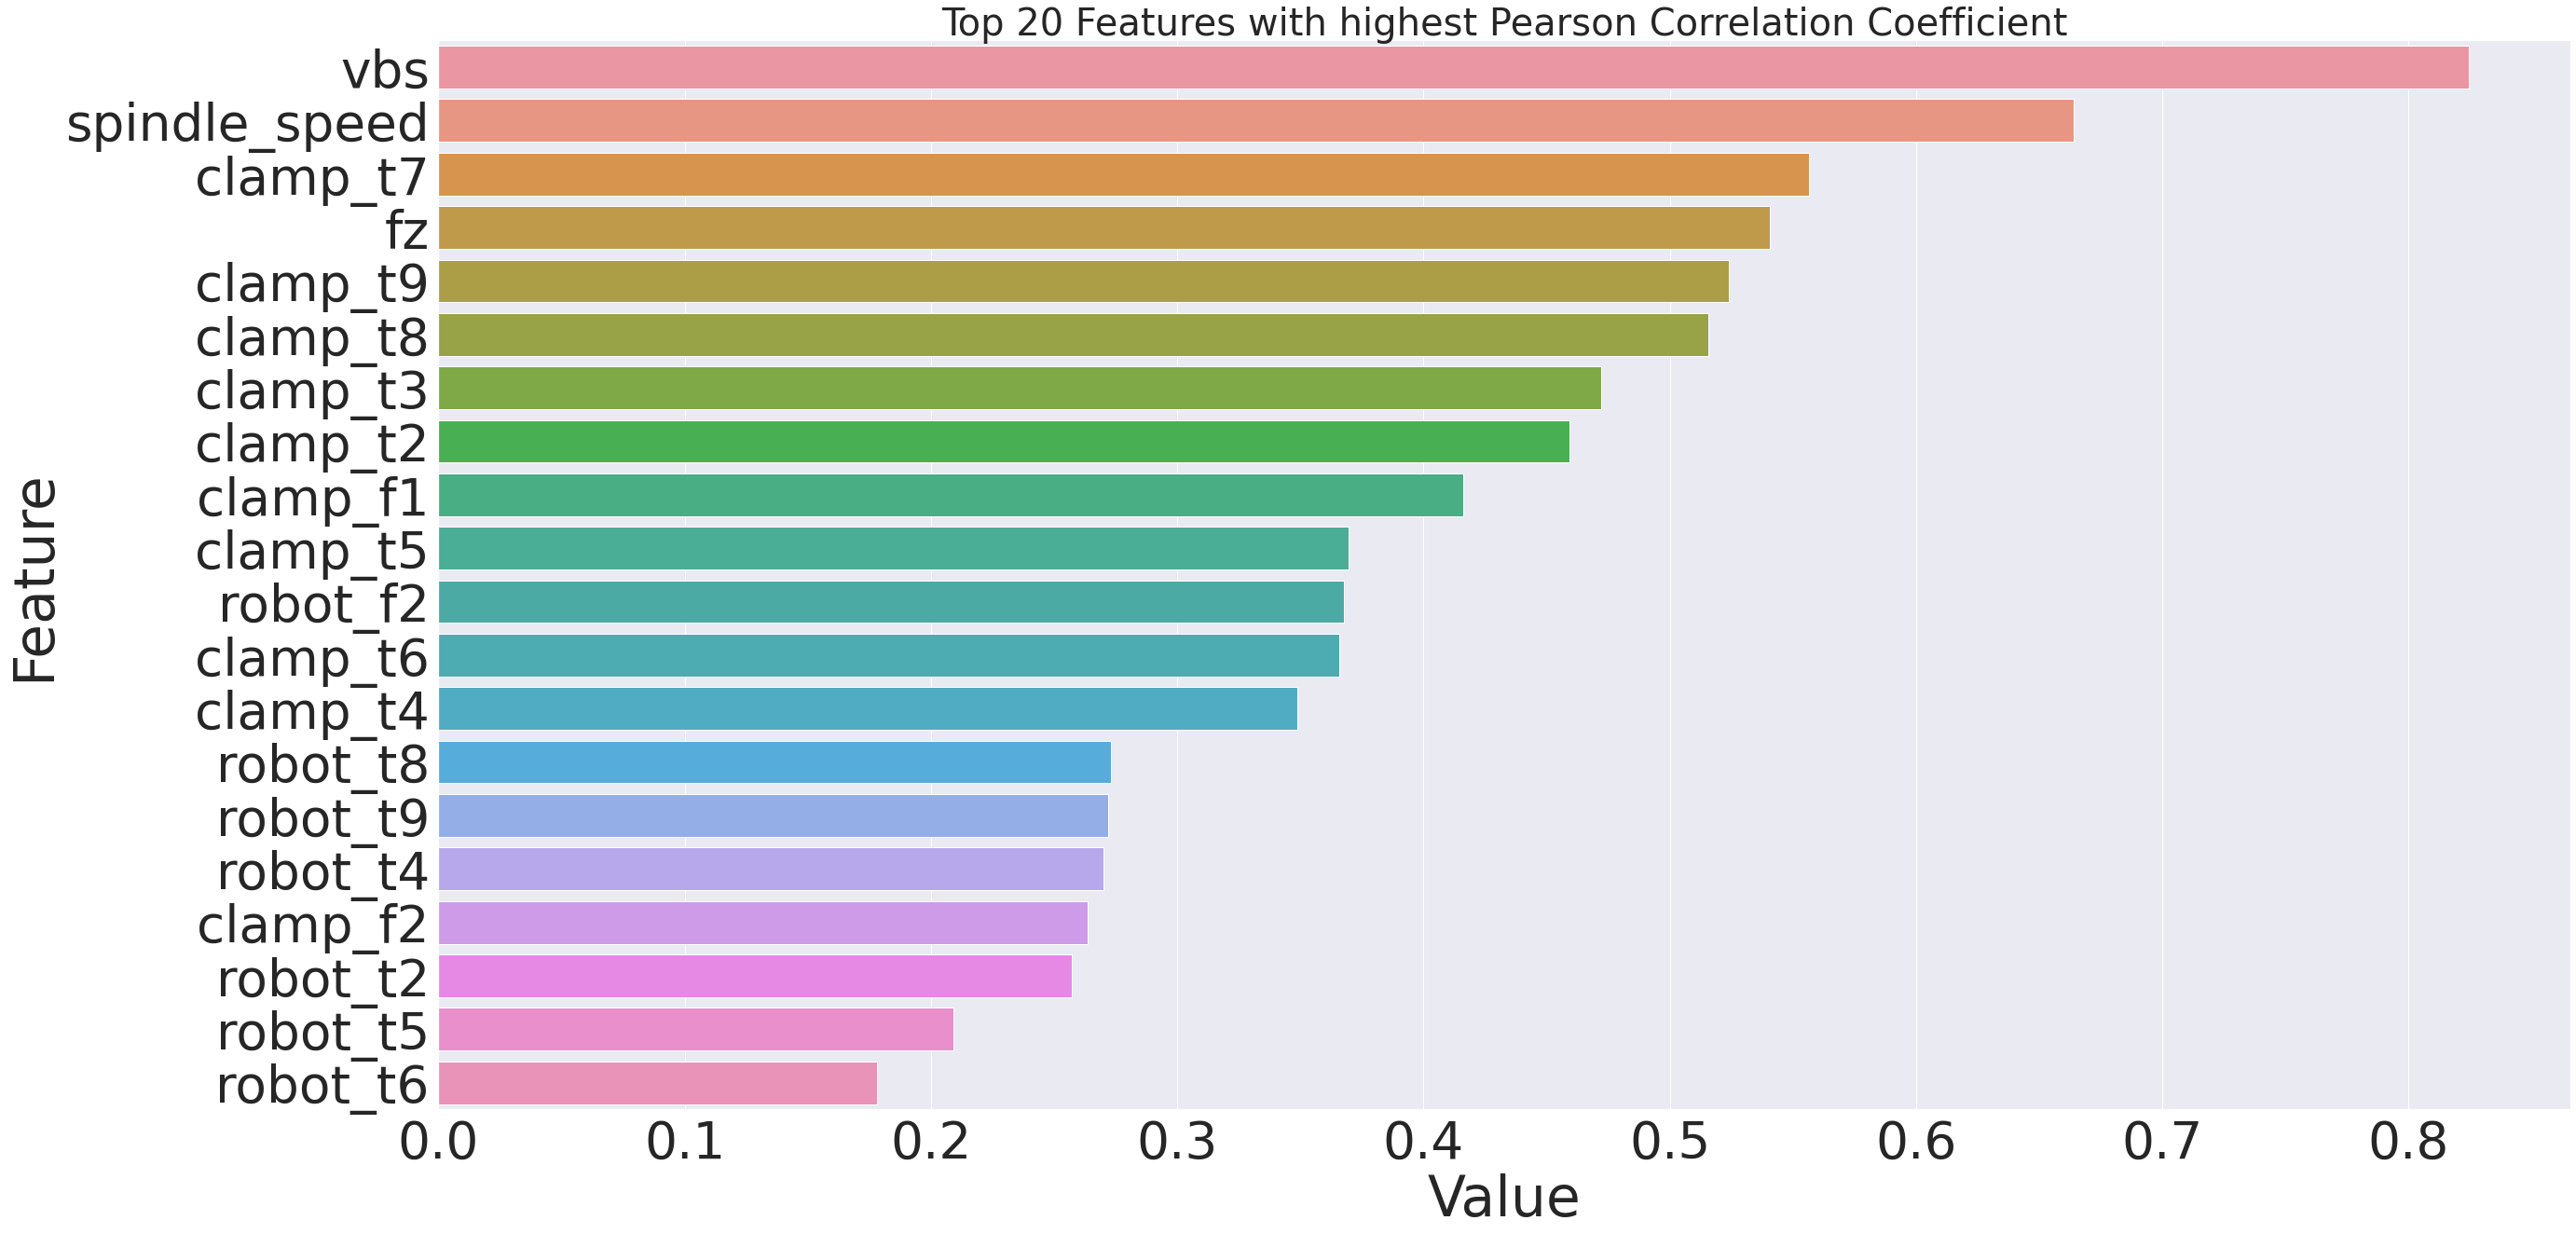

Value        Feature
0   0.824391            vbs
1   0.663960  spindle_speed
2   0.556392       clamp_t7
3   0.540746             fz
4   0.524126       clamp_t9
5   0.515555       clamp_t8
6   0.472022       clamp_t3
7   0.459456       clamp_t2
8   0.416085       clamp_f1
9   0.369452       clamp_t5
10  0.367750       robot_f2
11  0.365932       clamp_t6
12  0.348653       clamp_t4
13  0.273051       robot_t8
14  0.271832       robot_t9
15  0.270167       robot_t4
16  0.263462       clamp_f2
17  0.257009       robot_t2
18  0.209240       robot_t5
19  0.178059       robot_t6

In [23]:
plotPerson(selected_feature_value, selected_feature, num=select_top_num)